# Подготовка данных для машинного обучения

**Выполним обработку датасета "Mental Health in Tech Survey" с Kaggle**







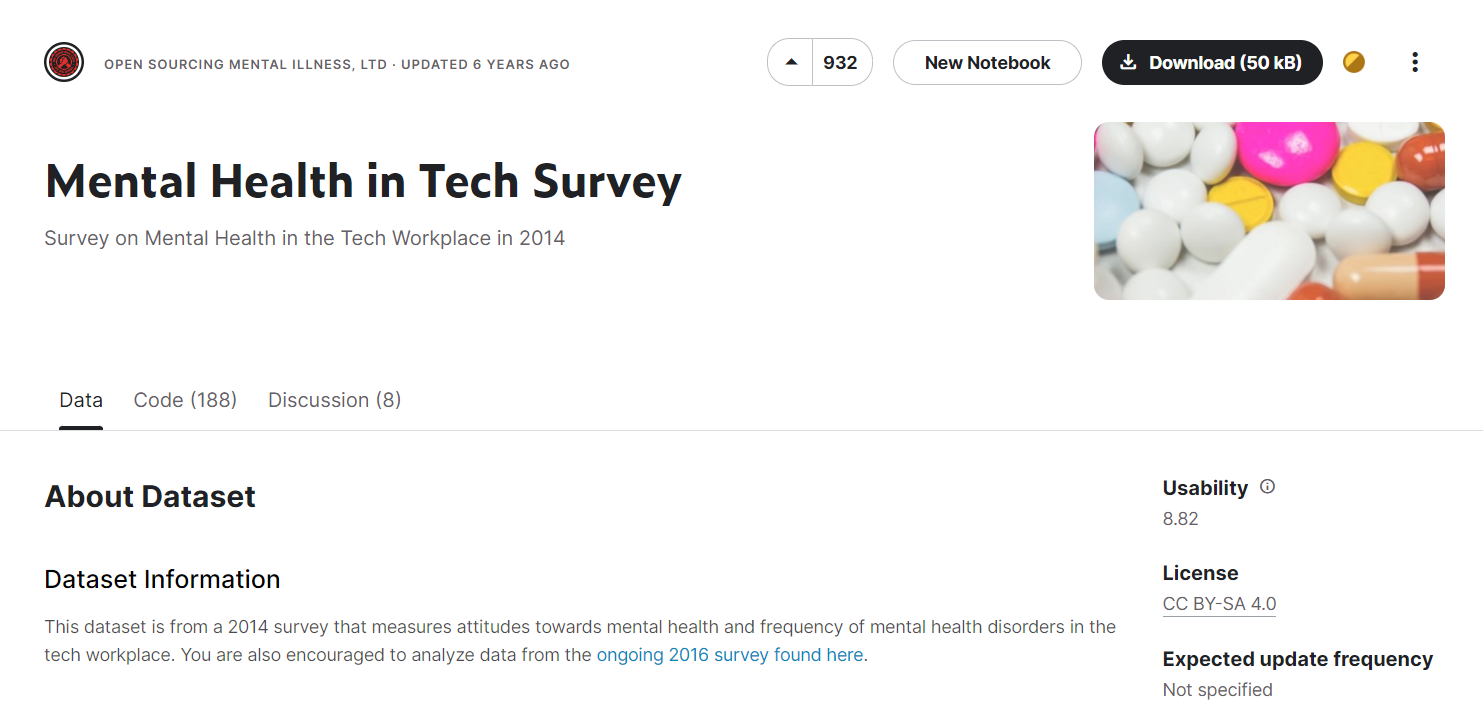

## Наименование признаков рассматриваемого датасета
Timestamp (время)

Age (возраст)

Gender (пол)

Country (страна)

state (штат) 

self_employed (самозанятый)

family_history: Есть психические заболевания в вашей семье?

treatment: Обращались ли вы за лечением по поводу психического расстройства?

work_interfere: Если у вас есть проблемы с психическим здоровьем, чувствуете ли вы, что это мешает вашей работе?

no_employees: Сколько сотрудников в вашей компании?

remote_work: 50% рабочего времени вы работаете удаленно?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [89]:
import pandas as pd
import numpy as np
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Характеристики датасета

In [90]:
df.shape # размерность


(1259, 27)

In [91]:
df.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: >

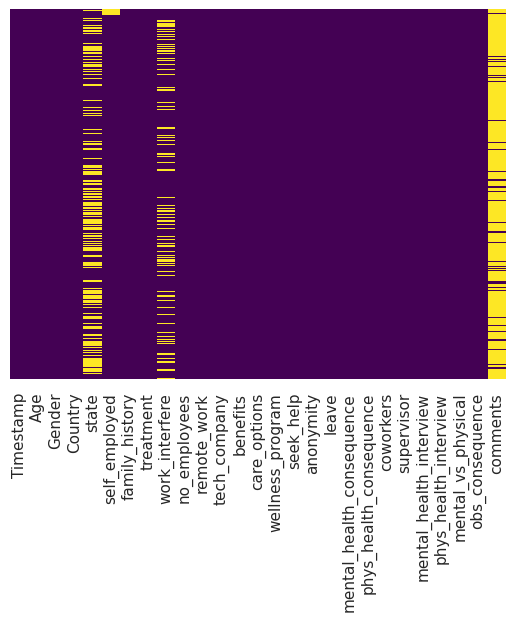

In [92]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
df.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max
              # только для числовых значений


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [94]:
df.nunique() # количество уникальных значений для каждого столбца 

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [95]:
#количество каждого уникального значения для каждого столбца в наборе данных
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print("----------------------------------")
    print(df[column].value_counts(dropna=False)) 
    print("==================================")

Timestamp
----------------------------------
Timestamp
2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
                      ..
2014-08-27 15:35:21    1
2014-08-27 15:34:32    1
2014-08-27 15:34:31    1
2014-08-27 15:34:23    1
2016-02-01 23:04:31    1
Name: count, Length: 1246, dtype: int64
Age
----------------------------------
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              

## Выделение целевой переменной
Выбор целевой переменной зависит от решаемой задачи. Например, решаем задачу классификации: Будет ли опрашиваемый человек лечиться 

In [96]:
features = df.drop(['treatment'], axis=1)
labels = df['treatment']
print(features.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history work_interfere    no_employees remote_work  ...  \
0             No          Often            6-25          No  ...   
1             No         Rarely  More than 1000          No  ...   
2             No         Rarely            6-25          No  ...   
3            Yes          Often          26-100          No  ...   
4             No          Never         100-500         Yes  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                  

## Чистка датасета 
Столбец «age» содержит людей, которые еще не родились (отрицательные числа).

Столбец «age» содержит детей (например, 5-летнего возраста), которые вряд ли будут проводить опрос о своем рабочем месте.

Столбец «age» содержит возраст в 99999999999 лет

Существует 49 различных значений для «gender». Для примера, «Male» и «male» обозначают одно и то же, но в рассматриваются как две разные категории.

self_employed и work_interfere содержат несколько пропущенных полей.





### Обработка пропусков данных
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.

Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.

Для начала необходимо определить что делать с пропущенными значениями, найденными в self_employed и work_interfere. В обоих случаях столбец содержит категориальные данные.

In [97]:
features['self_employed'] = features['self_employed'].fillna('undefined')
features['work_interfere'] = features['work_interfere'].fillna('undefined')
print(features.head)


<bound method NDFrame.head of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL     undefined   
1     2014-08-27 11:29:37   44       M   United States    IN     undefined   
2     2014-08-27 11:29:44   32    Male          Canada   NaN     undefined   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN     undefined   
4     2014-08-27 11:30:22   31    Male   United States    TX     undefined   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history work_interfer

Посмотрим на статистику пропусков данных по различным переменным

In [98]:
missing_counts = features.isnull().sum()
missing_counts

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Посмотрим, что там за данные и какова причина пропусков в столбце state.

In [99]:
features[['state', 'Country']][1:20]

,state,Country
1,IN,United States
2,NaN,Canada
3,NaN,United Kingdom
4,TX,United States
5,TN,United States
6,MI,United States
7,NaN,Canada
8,IL,United States
9,NaN,Canada
10,OH,United States


Совершенно очевидно, что это неслучайные пропуски данных и удалять из-за них строки нецелесообразно.

### Поиск неявных дубликатов

Как упоминалось ранее, для «gender» 49 различных значений, и было подозрение, что некоторые из этих значений не следует рассматривать как разные категории. В конечном итоге для простоты мы разделим данные на 3 категории: мужчина, женщина и другие (сюда вошли те категории, которые можно однозначно исключить из предыдущих двух, для примера - трансгендер).

In [100]:
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"] 
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

features['Gender'] = features["Gender"].apply(lambda x: clean_gender(x)) 
print(features.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL     undefined   
1  2014-08-27 11:29:37   44    Male   United States    IN     undefined   
2  2014-08-27 11:29:44   32    Male          Canada   NaN     undefined   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN     undefined   
4  2014-08-27 11:30:22   31    Male   United States    TX     undefined   

  family_history work_interfere    no_employees remote_work  ...  \
0             No          Often            6-25          No  ...   
1             No         Rarely  More than 1000          No  ...   
2             No         Rarely            6-25          No  ...   
3            Yes          Often          26-100          No  ...   
4             No          Never         100-500         Yes  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                  

### Обнаружение выбросов

Для Age существуют значения, которые кажутся ошибочными. Такие как отрицательный возраст или чрезвычайно большие целые числа, могут негативно повлиять на результат работы алгоритма машинного обучения, и нам нужно будет их устранить.
Для этого возьмем эвристическую оценку, в каком возрасте могут работать люди: от 14 до 100 лет. 

In [101]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns 

/tmp/ipykernel_23597/2224663157.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features.Age.dropna())


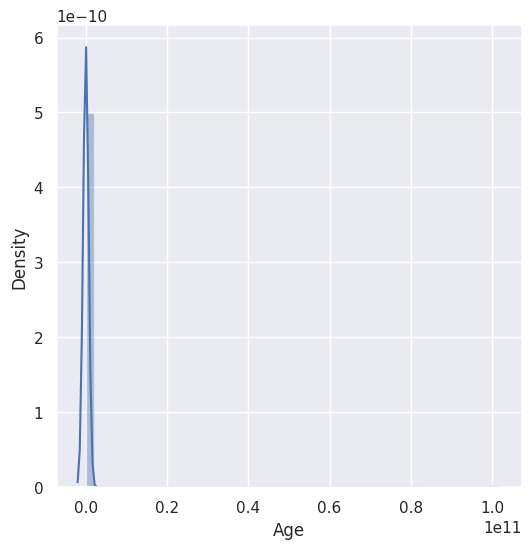

In [102]:
#визуализация распределения возраста
sns.set(color_codes=True) 
plot = sns.distplot(features.Age.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

<Axes: xlabel='Age'>

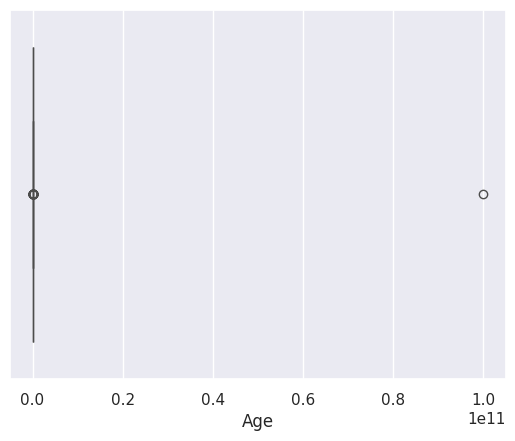

In [103]:
sns.boxplot(x=features.Age.dropna())

Смотрим на масштаб и видим, что есть проблемы.

In [104]:
features.Age.loc[(features.Age <14) | (features.Age> 100)] = np.nan
print(features.isnull().sum()['Age'])

8


/tmp/ipykernel_23597/661381918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.Age.loc[(features.Age <14) | (features.Age> 100)] = np.nan


/tmp/ipykernel_23597/3183970430.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(features.Age.dropna())


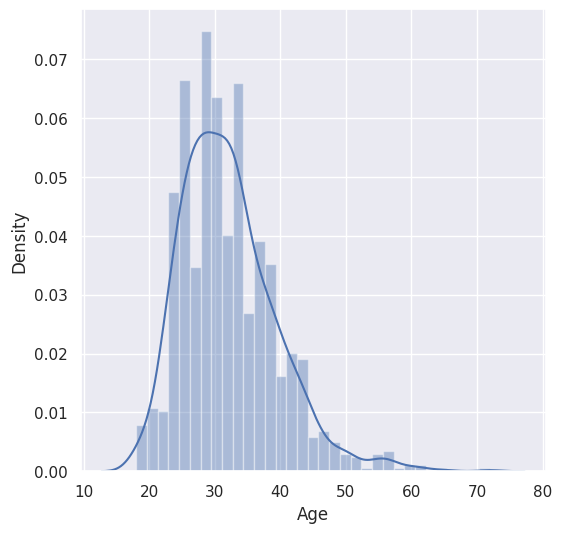

In [105]:
#визуализация распределения возраста
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(features.Age.dropna()) 
plot.figure.set_size_inches(6,6) # в дюймах

0
72.0


<Axes: xlabel='Age'>

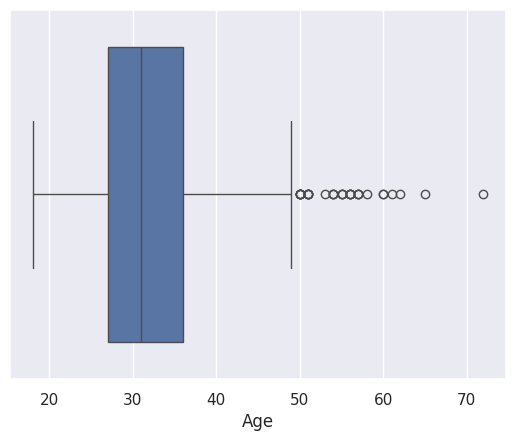

In [106]:
#обработка nan значений, замена их на среднее значение по столбцу
features['Age'] = features['Age'].fillna(features['Age'].mean())
print(features.isnull().sum()['Age'])
print(features.Age.max())
sns.boxplot(x=features.Age.dropna())

### Кодирование данных

Многие алгоритмы машинного обучения ожидают числовые входные данные, поэтому нужно выяснить способ представления категориальных данных численным образом.

Одним из решений этого было бы произвольное присвоение числового значения для каждой категории и отображение набора данных из исходных категорий в каждое соответствующее число. Например, рассмотрим столбец «leave» (как легко вам взять отпуск по болезни для состояния психического здоровья?)

In [107]:
features['leave'].value_counts(dropna=False) 

leave
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: count, dtype: int64

In [108]:
#ручное кодирование данных
features['leave'] = df['leave'].map({'Very difficult': 0, 
                               'Somewhat difficult': 1, 
                               'Don\'t know': 2, 
                               'Somewhat easy': 3,
                               'Very easy': 4}) 

In [109]:
#автоматическое кодирование 
#Проблема с этим подходом заключается в том, что вводится порядок, который может отсутствовать в исходных данных. 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(features['leave']) 
label_encoder.transform(features['leave']) 


array([3, 2, 1, ..., 1, 2, 2])

Для кодирования номинальных данных используется метод one-hot-encoding. Создается столбец для каждого значения и используется 1 и 0 для обозначения выражения каждого значения. Эти новые столбцы часто называются фиктивными переменными.

In [110]:
#автоматическое кодирование
pd.get_dummies(features['leave']) 

,0,1,2,3,4
0,False,False,False,True,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
1254,False,False,False,True,False
1255,False,True,False,False,False
1256,False,True,False,False,False
1257,False,False,True,False,False


### Зависимости в данных
Чтобы каким-либо образом построить модель, желательно исключить взаимозависимости из данных, так как зависимые друг от друга переменные, как минимум увеличивают вычислительные затраты, а порой и мешают построению качественной модели

Прежде чем задаваться вопросом исключения лишних переменных, надо узнать, а как вообще обстоят дела с зависимостью. Нам поможет в этом библиотека seaborn.

        Age  leave
Age    1.00  -0.05
leave -0.05   1.00


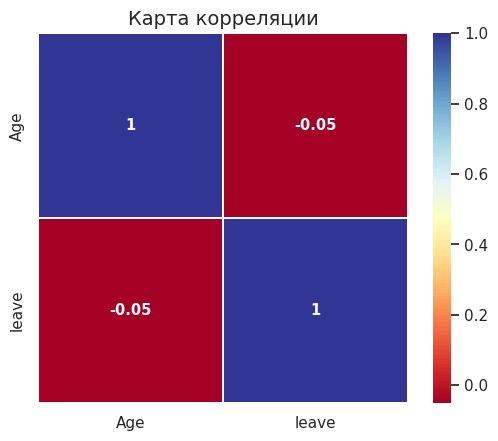

In [111]:
var_corr = round(features.corr(numeric_only=True),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()
# plt.colormaps() -  так можно посмотреть доступные цветовые карты

### Нормализация данных

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

**Нормализация на стандартное отклонение (StandartScaler)** - используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.

**Нормализация Min-max** устанавливает наименьшее наблюдаемое значение равным 0, а наибольшее наблюдаемое значение — 1.


In [112]:
#нормализация на стандартное отклонение 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features[['Age']]=scale_features_std.fit_transform(features[['Age']]) 
print(features.head())

             Timestamp       Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31  0.677932  Female   United States    IL     undefined   
1  2014-08-27 11:29:37  1.641831    Male   United States    IN     undefined   
2  2014-08-27 11:29:44 -0.010567    Male          Canada   NaN     undefined   
3  2014-08-27 11:29:46 -0.148267    Male  United Kingdom   NaN     undefined   
4  2014-08-27 11:30:22 -0.148267    Male   United States    TX     undefined   

  family_history work_interfere    no_employees remote_work  ... leave  \
0             No          Often            6-25          No  ...     3   
1             No         Rarely  More than 1000          No  ...     2   
2             No         Rarely            6-25          No  ...     1   
3            Yes          Often          26-100          No  ...     1   
4             No          Never         100-500         Yes  ...     2   

  mental_health_consequence phys_health_consequence     coworkers supervis

In [113]:
#нормализация Min-max
features["Age"] = df["Age"]
features['Age'] = features['Age'].fillna(features['Age'].mean())
print(features.head())

from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features[["Age"]] = scale_features_mm.fit_transform(features[["Age"]]) 
print(features.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL     undefined   
1  2014-08-27 11:29:37   44    Male   United States    IN     undefined   
2  2014-08-27 11:29:44   32    Male          Canada   NaN     undefined   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN     undefined   
4  2014-08-27 11:30:22   31    Male   United States    TX     undefined   

  family_history work_interfere    no_employees remote_work  ... leave  \
0             No          Often            6-25          No  ...     3   
1             No         Rarely  More than 1000          No  ...     2   
2             No         Rarely            6-25          No  ...     1   
3            Yes          Often          26-100          No  ...     1   
4             No          Never         100-500         Yes  ...     2   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                       

### Разделение данных для обучения и тестирования
Разделение данных на обучающую и тестовую выборку. Выделение тестовой выборки необходимо для понимания того, что модель обучена в достаточной степени (не произошло переобучение или недообучение)

In [1]:
from sklearn.model_selection import train_test_split 

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0) 

print(features.shape)
print(features_train.shape)
print(features_test.shape)

NameError: name 'features' is not defined

## **Задание**
1. Выполнить обработку одного из наборов данных:
- отток клиентов кабельного оператора (customers.csv)
- отток клиентов телекоммуникационного оператора (telecom_churn.csv)
- цены на недвижимость (данные и их описание находятся в архиве HousePices.zip)
- цены на автомобили (auto_sales.xls)
2. Выполнить операции анализа и предобработки датасета для заданного датасета

#### Вариант задания:
- студенты, чей номер по списку делится на 4 без остатка, работают с customers.csv
- студенты, чей номер по списку делится на 4 с остатком 1, работают с telecom_churn.csv
- студенты, чей номер по списку делится на 4 с остатком 2, работают с HousePrices.zip
- студенты, чей номер по списку делится на 4 с остатком 3, работают с auto_sales.xls